In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from aging.behavior.syllables import relabel_by_usage
from aging.plotting import figure, legend, format_plots
import colorcet as cc

In [2]:
format_plots()

In [3]:
## update data
def filter_df(df):
    max=39
    #df.drop('9c060c9b-9eee-4788-90be-803700bbacd8',level=3, axis=0, inplace=True)
    syll=df.columns.values[df.columns.values>max]
    df.drop(syll,axis=1, inplace=True)
    return df[~df.index.get_level_values('session_name').str.contains('CRL')]

In [4]:
path = Path('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/ontogeny_males_relabeled_usage_matrix_v00.parquet')
df = pd.read_parquet(path)

In [5]:
# arrange data
data_ont = df.astype(float, errors='ignore')
data_ont= filter_df(data_ont).groupby(['age','uuid']).mean()

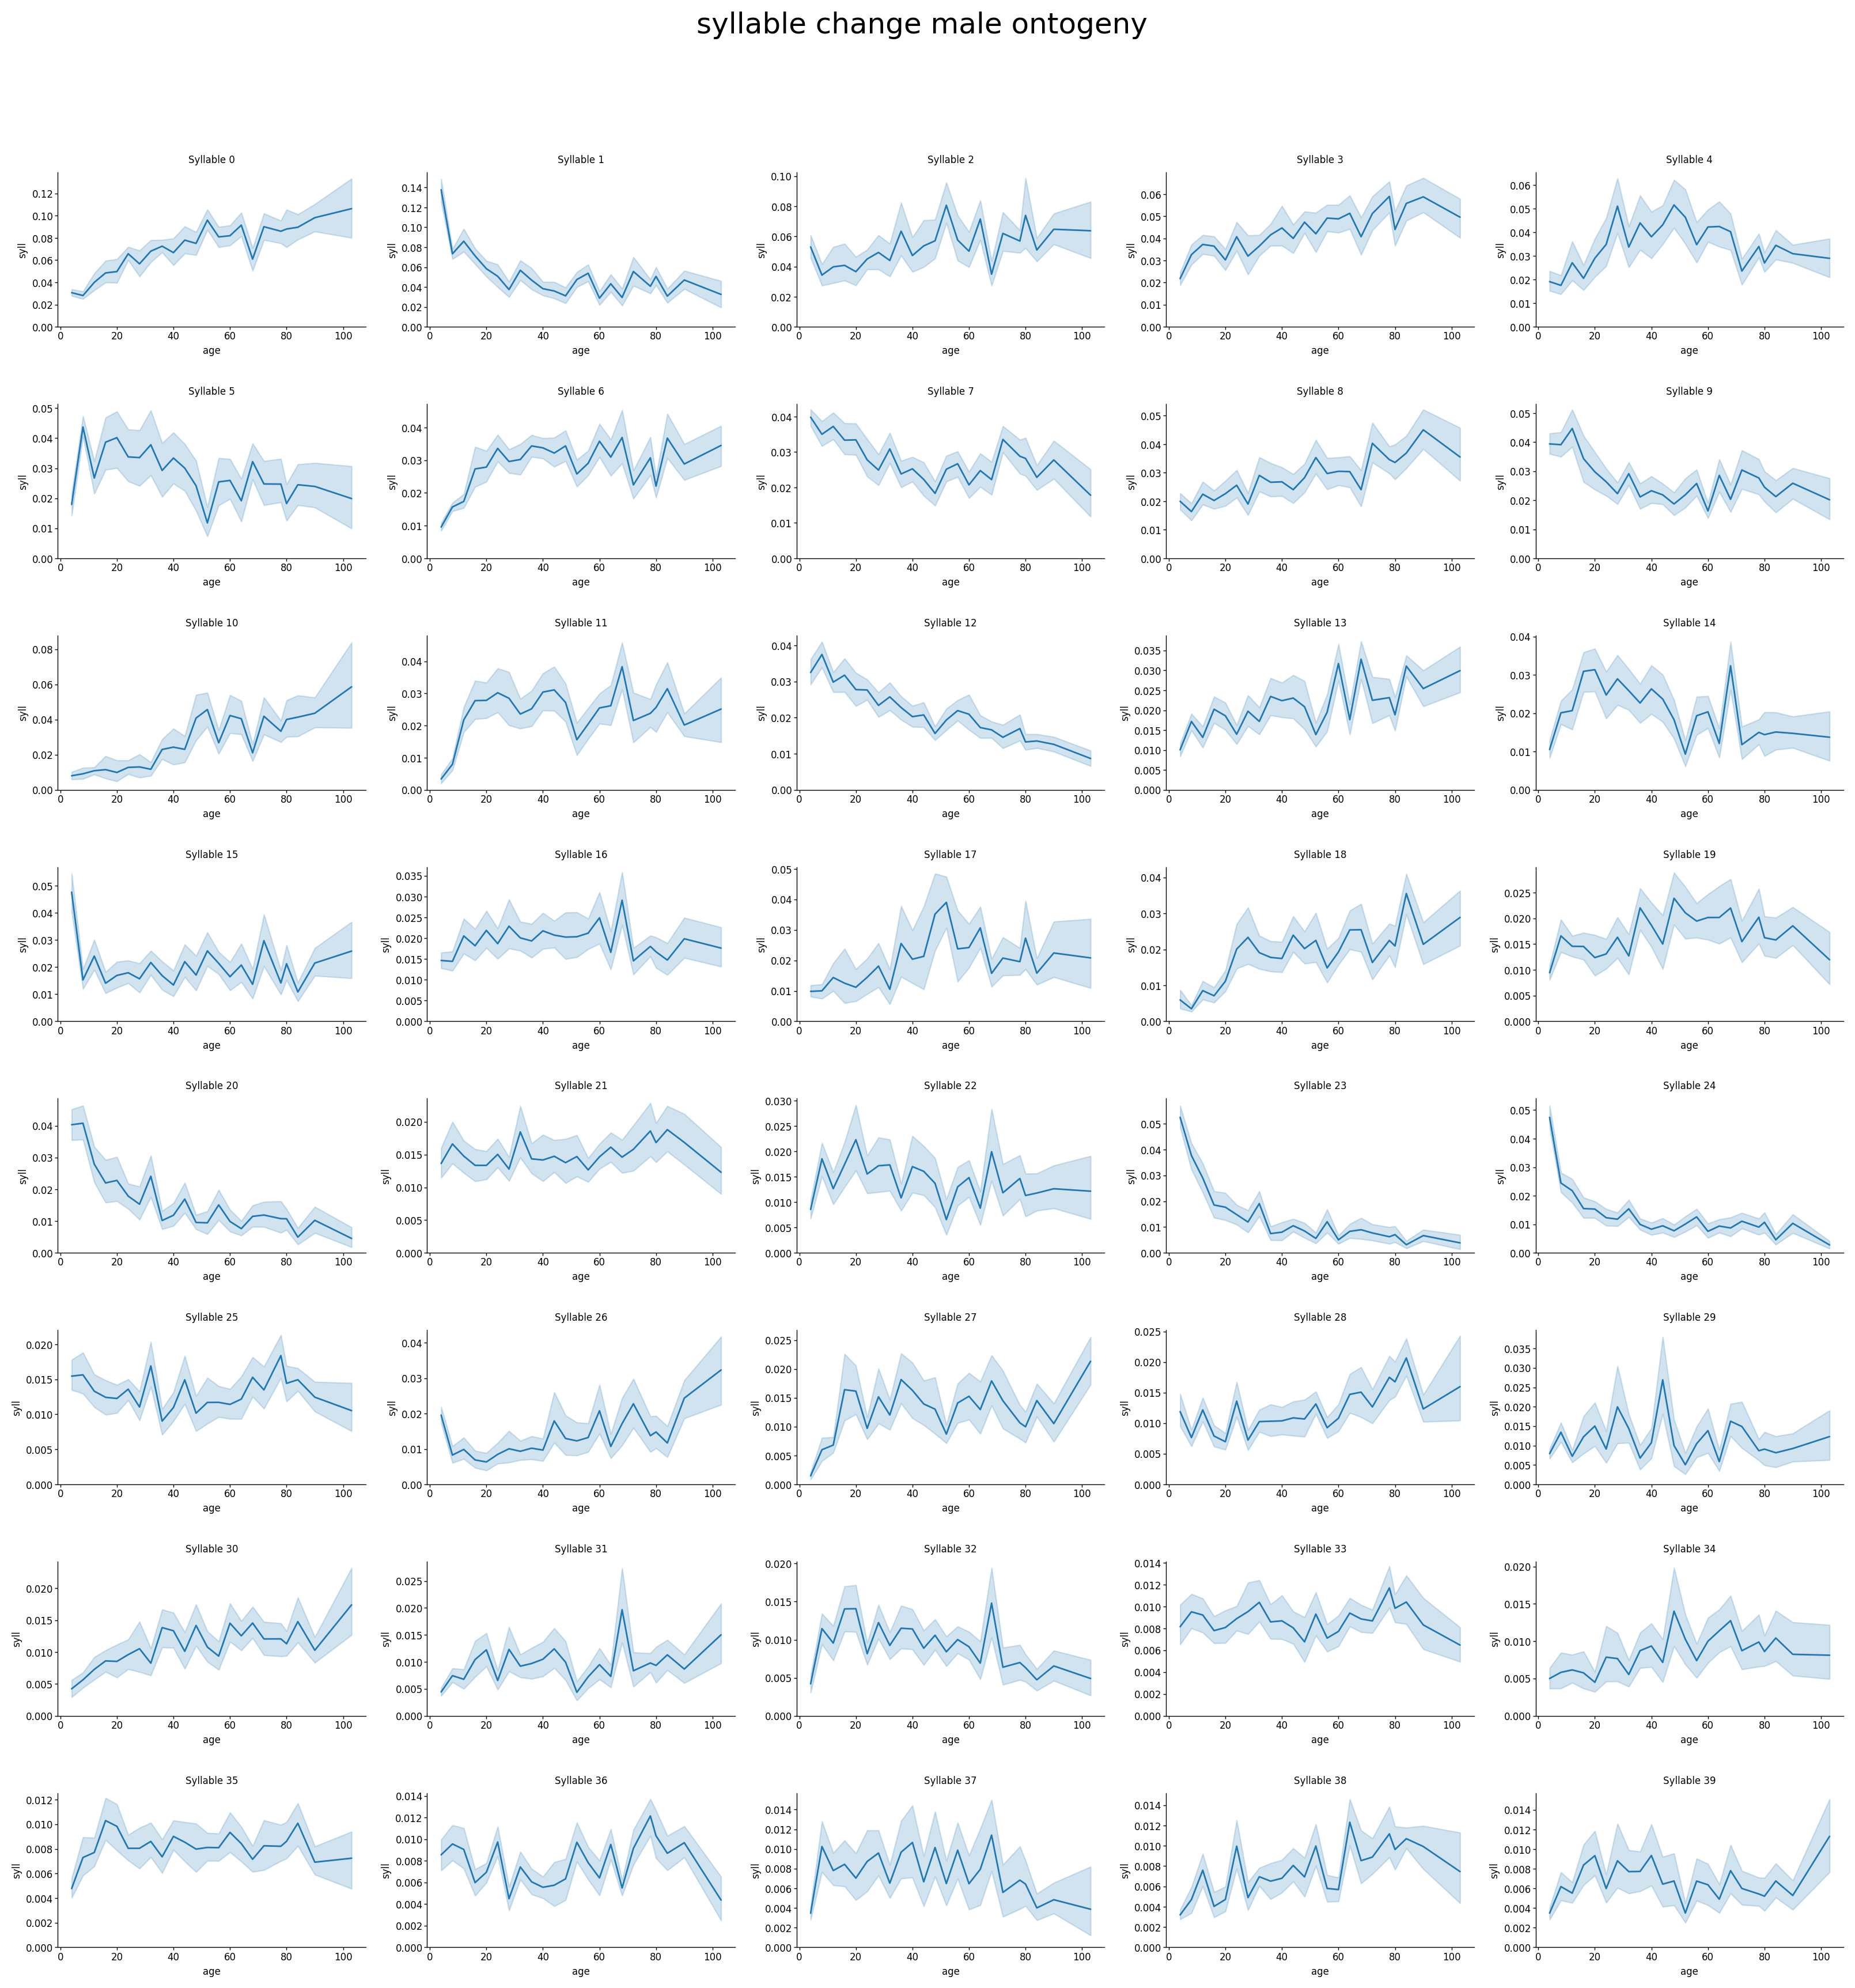

In [31]:
n=0
fig=plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("syllable change male ontogeny", fontsize=18, y=0.95)
for syllable in range(40):
    ax = plt.subplot(8, 5, n + 1)
    data_tmp = data_ont[[syllable]].rename(columns={syllable: 'syll'})    
    sns.lineplot(
            data=data_tmp.reset_index(),
            x="age",
            y="syll")
    sns.despine()
    ax.set(title=f"Syllable {syllable}", ylim=(0, None))
    sns.despine()
    n=n+1

In [26]:
data_tmp

syll
age uuid                                          
4   055b68ad-b41d-4725-9d54-c8992d92934c  0.041373
    06852811-14ea-4fe3-8f6e-81bbd1ead951  0.041731
    2bb5e7fa-02cd-4694-accf-fed9651b1beb  0.035277
    30315149-532f-4d6a-b3c9-b1dcd1e707fe  0.046257
    32221902-9ee7-4d36-a7f4-e76375e3084e  0.039895
...                                            ...
103 b9e9f69e-9b6d-4220-b2a7-f39f9f918278  0.030432
    d344c424-2188-4a5b-b45e-50818128127f  0.018087
    dff86510-b65f-4713-aa22-0a4e95f53c23  0.021224
    e53d5526-2371-42c1-ab8b-4550d658df60  0.013732
    f16bd29c-0284-4226-ab85-ff008abb01e4  0.001570

[360 rows x 1 columns]